In [1]:
from __future__ import print_function, division, absolute_import
import os
import sys
sys.path.insert(0, "C:\\Users\\Matt\\Desktop\\orbithunter\\")
from orbithunter import *
import numpy as np
import matplotlib.pyplot as plt
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable
from math import pi

In [2]:
def generate_axes_labels(plot_orbit):
    # Create time ticks, with the separation
    if plot_orbit.T > 5:
        timetick_step = np.max([np.min([100, (5 * 2**(np.max([int(np.log2(plot_orbit.T//2)) - 3,  1])))]), 5])
        yticks = np.arange(0, plot_orbit.T, timetick_step)
        ylabels = np.array([str(int(y)) for y in yticks])
    elif 0 < plot_orbit.T <= 5:
        scaled_T = np.round(plot_orbit.T, 1)
        yticks = np.array([0, plot_orbit.T])
        ylabels = np.array(['0', str(scaled_T)])
    else:
        plot_orbit.T = np.min([plot_orbit.L, 1])
        yticks = np.array([0, plot_orbit.T])
        ylabels = np.array(['0', '$\\infty$'])

    if plot_orbit.L > 2*pi*np.sqrt(2):
        xmult = (plot_orbit.L // 64) + 1
        xscale = xmult * 2*pi*np.sqrt(2)
        xticks = np.arange(0, plot_orbit.L, xscale)
        xlabels = [str(int((xmult*x) // xscale)) for x in xticks]
    else:
        scaled_L = np.round(plot_orbit.L / (2*pi*np.sqrt(2)), 1)
        xticks = np.array([0, plot_orbit.L])
        xlabels = np.array(['0', str(scaled_L)])

    return xticks, xlabels, yticks, ylabels

In [3]:
shift = read_h5('RelativeOrbitKS_T15p855_L13p026.h5', directory='../data/tiles/original/')

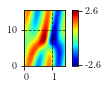

In [4]:
shift.plot(fundamental_domain=False)

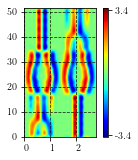

In [8]:
from orbithunter.gluing import tile_dictionary_ks
td = tile_dictionary_ks(tileset='extra_padded_space')
td = rediscretize_tiling_dictionary(td, new_shape=(128,128))
# td = tile_dictionary_ks()
symbol_array = np.array([[0, 1], [2, 2], [1, 0]])
tiled_orbit = tile(symbol_array, td, OrbitKS).rescale(3).reshape().convert(to='modes')
tiled_orbit.plot()

np.random.seed(0)
big_symbol_array = (3*np.random.rand(10, 10)).astype(int)

In [9]:
figs = '../data/local/thesis/figures/'


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 74535.87904834078
Target residual tolerance : 8.192e-06
Maximum iteration number : 131072
Initial guess : OrbitKS({"basis": "modes", "parameters": ["171.5085", "118.9257", "0"], "field_shape": ["64", "128"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=49.6898061 after 5000 gradient descent steps. Parameters:(171.70062727681443, 141.17967254390925, 0)
#################################################
 Residual=30.5706159 after 10000 gradient descent steps. Parameters:(171.8409135956888, 142.3779543051194, 0)
#################################################
 Residual=23.9591723 after 15000 gradient descent steps. Parameters:(171.9484444501479, 142.93272441972425, 0)
#################################################
 Residual=20.43355

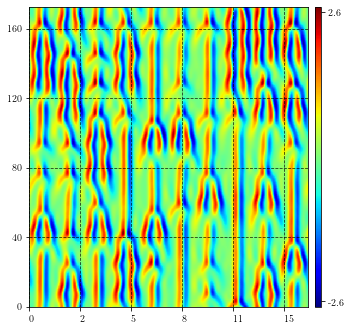

In [10]:
big_tiling = tile(big_symbol_array, td, OrbitKS).reshape(64, 128).convert(to='modes')
big_tiling.plot(show=False, padding=True, padding_shape=(512, 512),
                save=True, filename='big_tiling_initial.pdf',
                directory=figs)

big_tiling_result_gdnoprec = converge(big_tiling, verbose=True, preconditioning=False)
big_tiling_result_gdnoprec.orbit.plot(padding=True, padding_shape=(512, 512), save=True,
                filename='big_tiling.pdf', 
                directory=figs)

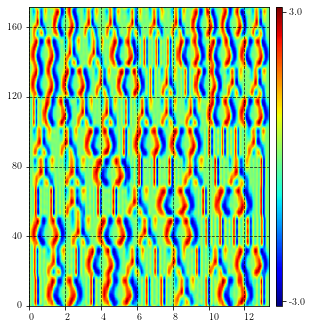


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 369636.8579731221
Target residual tolerance : 8.192e-06
Maximum iteration number : 131072
Initial guess : OrbitKS({"basis": "modes", "parameters": ["171.5085", "118.9257", "0"], "field_shape": ["64", "128"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=33.0267312 after 5000 gradient descent steps. Parameters:(171.91599492315524, 140.148068826673, 0)
#################################################
 Residual=22.1080613 after 10000 gradient descent steps. Parameters:(172.15820695176552, 140.47435138938638, 0)
#################################################
 Residual=17.3747647 after 15000 gradient descent steps. Parameters:(172.34282423107877, 140.6503392130523, 0)
#################################################
 Residual=14.52510

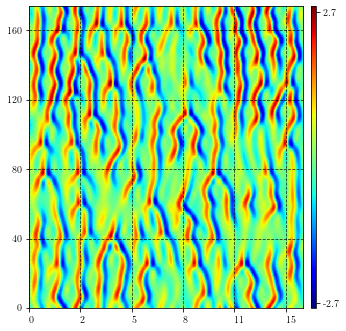

In [15]:

big_tiling_stripwise = tile(big_symbol_array, td, OrbitKS, stripwise=True, gluing_order=(1,0)).reshape(64, 128).convert(to='modes')
big_tiling_stripwise.plot(padding=True, padding_shape=(512, 512), save=True,
                filename='big_tiling_stripwise_initial.pdf', 
                directory=figs)

big_tiling_stripwise_result_gdnoprec = converge(big_tiling_stripwise, verbose=True, preconditioning=False)
# big_tiling_stripwise_result_gdnoprec.orbit.to_h5('big_tiling_stripwise.h5', directory='../data/local/thesis/large/')
big_tiling_stripwise_result_gdnoprec.orbit.plot(padding=True, padding_shape=(512, 512), save=True,
                                                filename='big_tiling_stripwise.pdf', 
                                                directory=figs)

In [5]:
datadir = '../data/examples/gluing/'
o0=read_h5('OrbitKS_T41p382_L38p050.h5', directory=datadir).reshape(512,512)
o1=read_h5('OrbitKS_T46p754_L31p245.h5', directory=datadir).reshape(512,512)
o2=read_h5('OrbitKS_T43p819_L34p784.h5', directory=datadir).reshape(512,512)
o3=read_h5('OrbitKS_T36p167_L25p720.h5', directory=datadir).reshape(512,512)

random_orbit_td = {0:o0,1:o1,2:o2,3:o3}

np.random.seed(0)
symbol_array = (4*np.random.rand(10, 10)).astype(int)
random_orbit_tiling = tile(symbol_array, random_orbit_td, OrbitKS, stripwise=False).reshape()

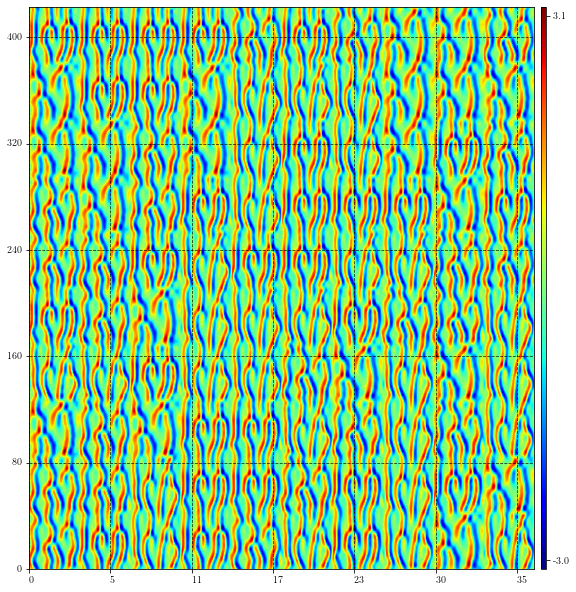

In [6]:
random_orbit_tiling.plot()

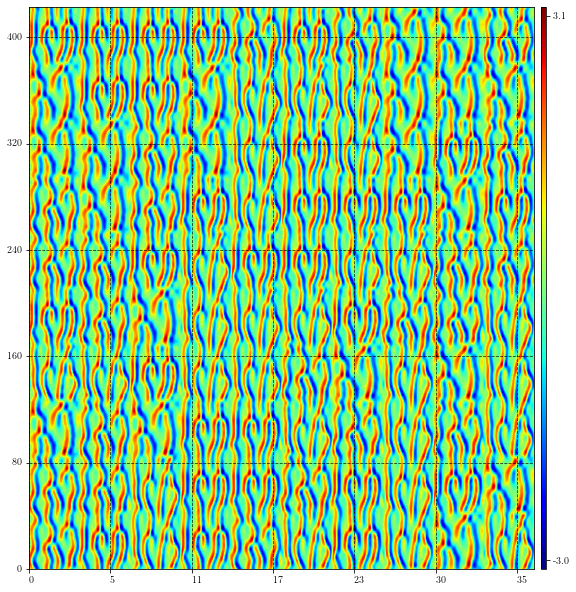

In [14]:
random_orbit_tiling.plot(filename='random_orbit_tiling_initial.pdf', directory=figs)

In [7]:
random_orbit_tiling_result = converge(random_orbit_tiling, method='adj', verbose=True)


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 4761.635906993459
Target residual tolerance : 3.2768e-05
Maximum iteration number : 524288
Initial guess : OrbitKS({"basis": "modes", "parameters": ["422.8193", "330.7199", "0"], "field_shape": ["128", "256"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=13.7666523 after 5000 gradient descent steps. Parameters:(423.4220344166856, 339.3586395397368, 0)
#################################################
 Residual=9.2471818 after 10000 gradient descent steps. Parameters:(423.71071370272824, 339.95391060123757, 0)
#################################################
 Residual=7.3498948 after 15000 gradient descent steps. Parameters:(423.9068391093824, 340.2075400311132, 0)
#################################################
 Residual=6.1848841

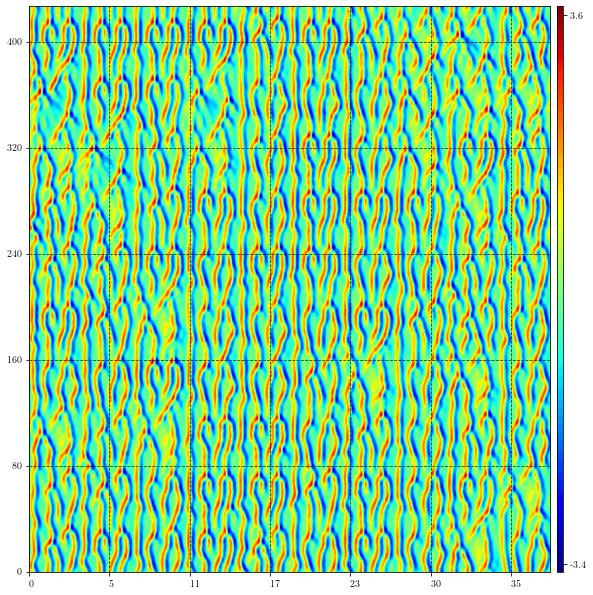

In [13]:
random_orbit_tiling_result.orbit.plot(filename='random_orbit_tiling.pdf', directory=figs)

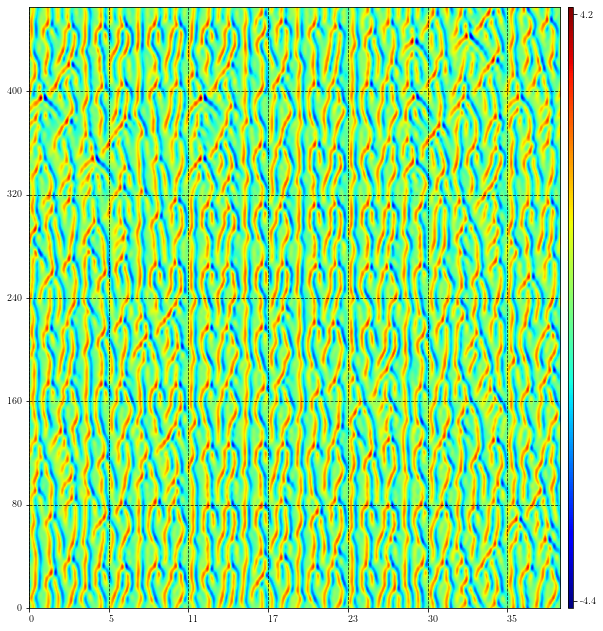

In [14]:
random_orbit_tiling_result.orbit.plot()

In [15]:
random_orbit_tiling_result = converge(random_orbit_tiling, method='gmres',
                                      scipy_kwargs={'tol':1e-5, 'maxiter':10, 'restart':50},
                                      preconditioning=True,
                                      verbose=True)


------------------------------------------------------------------------------------------------
Starting gmres optimization
Initial residual : 4761.635906993459
Target residual tolerance : 3.2768e-05
Maximum iteration number : 250
Initial guess : OrbitKS({"basis": "modes", "parameters": ["422.8193", "330.7199", "0"], "field_shape": ["128", "256"]})
-------------------------------------------------------------------------------------------------
######################### Residual=6.4857258 after 25 gmres iterations
######################### Residual=4.9148593 after 50 gmres iterations
######################### Residual=4.0326831 after 75 gmres iterations
######################### Residual=3.2233611 after 100 gmres iterations
######################### Residual=2.7467338 after 125 gmres iterations
######################### Residual=2.5007244 after 150 gmres iterations
######################### Residual=2.3020253 after 175 gmres iterations
######################### Residual=2.1355362 aft

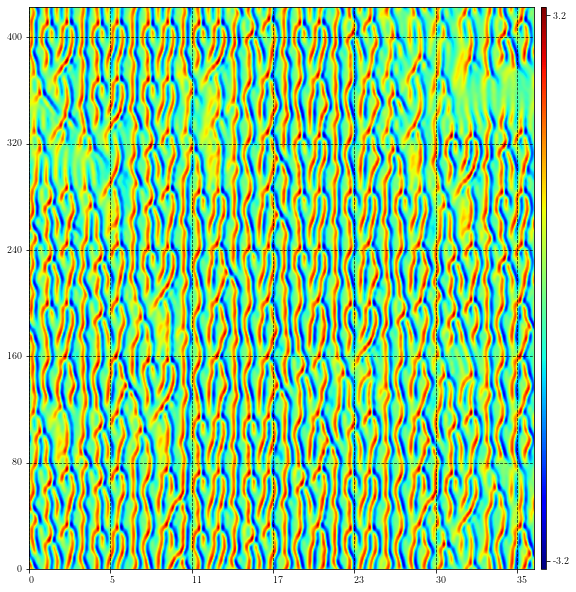

In [17]:
random_orbit_tiling_result.orbit.plot()

In [ ]:
random_orbit_tiling_result_prec = converge(random_orbit_tiling, method='gmres', scipy_kwargs={'tol':1e-3},
                                      verbose=True, preconditioning=True)

In [5]:
test = read_h5('OrbitKS_major_local_shifts_minres.h5', directory='../data/local/testing/')

OSError: Unable to open file (unable to open file: name = 'C:\Users\Matt\Desktop\orbithunter\data\local\testing\OrbitKS_major_local_shifts_minres.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [6]:
shd = shadowing(td[1].reshape(32,32), test.reshape(1024,1024))

NameError: name 'shadowing' is not defined

In [7]:
from orbithunter.physics_ks import shadowing

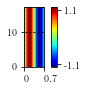

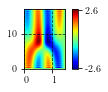

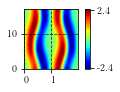

In [8]:
from orbithunter.gluing import tile_dictionary_ks
td = tile_dictionary_ks()
td[0].plot()
td[1].plot()
td[2].plot()

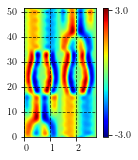

In [25]:
from orbithunter.gluing import tile_dictionary_ks
td = tile_dictionary_ks(tileset='space_padded')
td = rediscretize_tiling_dictionary(td, new_shape=(128,128))
# td = tile_dictionary_ks()
symbol_array = np.array([[0, 1], [2, 2], [1, 0]])
tiled_orbit = tile(symbol_array, td, OrbitKS).rescale(3).reshape().convert(to='modes')
tiled_orbit.plot()

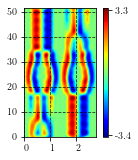

In [16]:
# fig, axes = plt.subplots(1, 2)
# ax1, ax2 = axes.flatten()
# orbits = (tiled_orbit, result.orbit)
# for ax, plot_orbit in zip(axes, orbits):
#     plot_orbit = plot_orbit.convert(to='field')
#     xticks, xlabels, yticks, ylabels = generate_axes_labels(plot_orbit)
#     image = ax.imshow(plot_orbit.convert(to='field').state, extent=[0, plot_orbit.L, 0, plot_orbit.T],
#                           cmap='jet', interpolation='none', aspect='auto')
#     # Include custom ticks and tick labels
#     ax.set_xticks(xticks)
#     ax.set_yticks(yticks)
#     ax.set_xticklabels(xlabels, ha='left')
#     ax.set_yticklabels(ylabels, va='center')
#     ax.grid(True, linestyle='dashed', color='k', alpha=0.8)

    
# # Custom colorbar values
# maxu = round(np.max(plot_orbit.state.ravel()) - 0.1, 2)
# minu = round(np.min(plot_orbit.state.ravel()) + 0.1, 2)

# cbarticks = [minu, maxu]
# cbarticklabels = [str(i) for i in np.round(cbarticks, 1)]
# fig.subplots_adjust(right=0.95)
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size=0.075, pad=0.1)
# cbar = plt.colorbar(image, cax=cax, ticks=cbarticks)
# cbar.ax.set_yticklabels(cbarticklabels)
# plt.show()

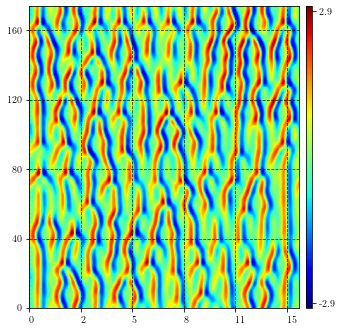

In [31]:
bigstrip = read_h5('OrbitKS_big_tiling_stripwise_gdnoprec.h5', directory='../data/local/testing/big/')
bigstrip.plot(filename='big_tiling_strip.pdf', directory=figs)

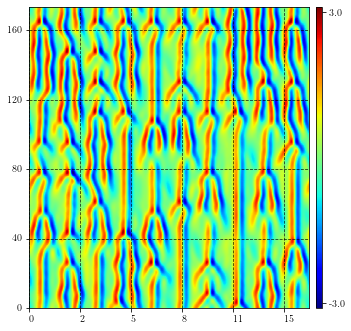

In [30]:
big = read_h5('OrbitKS_big_tiling_gdnoprec.h5', directory='../data/local/testing/big/')
big.plot(filename='big_tiling.pdf', directory=figs)

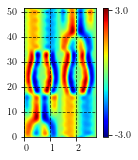

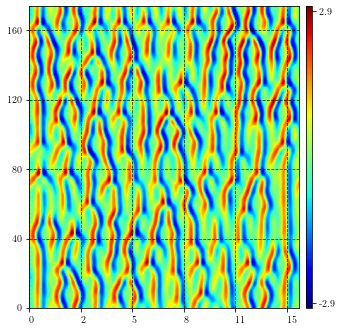

In [11]:
read_h5('OrbitKS_big_tiling_stripwise_gdnoprec.h5', directory='../data/local/testing/big').plot()
big_tiling.plot(padding=True, padding_shape=(512, 512), save=True,
                filename='OrbitKS_big_tiling_initial.pdf', 
                directory='../data/local/testing/')

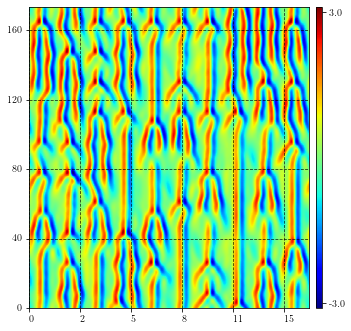

In [12]:
read_h5('OrbitKS_big_tiling_gdnoprec.h5', directory='../data/local/testing/big').plot()

In [ ]:
big_tiling_result_minres = converge(big_tiling, verbose=True, orbit_maxiter=1000,
                                               method='minres', scipy_kwargs={'tol':1e-8})
big_tiling_result_minres.orbit.to_h5('OrbitKS_big_tiling_minres.h5', directory='../data/local/thesis/')
big_tiling_result_minres.orbit.plt('big_tiling_result.pdf', directory='../data/local/thesis/figures')

In [ ]:
big_tiling_result_minres = converge(big_tiling, verbose=True, orbit_maxiter=1000,
                                               method='minres', scipy_kwargs={'tol':1e-8})
big_tiling_result_minres.orbit.to_h5('OrbitKS_big_tiling_minres.h5', directory='../data/local/testing/')

In [ ]:
big_tiling_result_minres.orbit.plot()

In [ ]:
big_tiling_result_gdnoprec = converge(big_tiling, verbose=True, preconditioning=False)
big_tiling_result_gdnoprec.orbit.to_h5('OrbitKS_big_tiling_gdnoprec.h5', directory='../data/local/testing/')

In [ ]:
big_tiling_result_gdnoprec.orbit.plot(padding=True)

In [ ]:
np.random.seed(0)
big_symbol_array = (3*np.random.rand(10, 10)).astype(int)
big_tiling_stripwise = tile(big_symbol_array, td, OrbitKS, stripwise=True, gluing_order=(1,0)).reshape(64, 128).convert(to='modes')
big_tiling_stripwise.to_h5(filename='OrbitKS_big_tiling_stripwise_initial.h5', directory='../data/local/testing/')
big_tiling_stripwise.plot(show=False, padding=True, padding_shape=(512, 512), save=True, filename='OrbitKS_big_tiling_stripwise_initial.png', directory='../data/local/testing/')
big_tiling_stripwise.plot(padding=True, padding_shape=(512, 512), save=True, filename='OrbitKS_big_tiling_stripwise_initial.pdf', directory='../data/local/testing/')

In [ ]:
big_tiling_stripwise_result_minres = converge(big_tiling_stripwise, verbose=True, orbit_maxiter=1000,
                                               method='minres', scipy_kwargs={'tol':1e-8})
big_tiling_stripwise_result_minres.orbit.to_h5('OrbitKS_big_tiling_stripwise_minres.h5', directory='../data/local/testing/')

In [ ]:
big_tiling_stripwise_result_minres.orbit.plot(padding=True)

In [ ]:
big_tiling_stripwise_result_gd = converge(big_tiling_stripwise, verbose=True)
big_tiling_stripwise_result_gd.orbit.to_h5('OrbitKS_big_tiling_stripwise_gd.h5', directory='../data/local/testing/')

In [ ]:
big_tiling_stripwise_result_gd.orbit.plot()

In [ ]:
np.random.seed(432)
symbol_array = 3*np.random.rand(30, 30).astype(int)
huge_tiling = tile(symbol_array, td, OrbitKS).reshape(512, 512).convert(to='modes')

In [ ]:
from orbithunter.gluing import tile_dictionary_ks
td = rediscretize_tiling_dictionary(tile_dictionary_ks(), new_shape=(256,256))

np.random.seed(432)
symbol_array = (3*np.random.rand(30, 30)).astype(int)
huge_tiling_stripwise = tile(symbol_array, td, OrbitKS, stripwise=True,
                             gluing_order=(1,0)).reshape(256, 512).convert(to='modes')

huge_tiling_stripwise.to_h5(filename='OrbitKS_huge_tiling_stripwise_10_initial.h5', directory='../data/local/testing/')
huge_tiling_stripwise.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, filename='OrbitKS_huge_tiling_stripwise_10_initial.png', directory='../data/local/testing/')
huge_tiling_stripwise.plot(padding=True, padding_shape=(2048, 2048), save=True, filename='OrbitKS_huge_tiling_stripwise_10_initial.pdf', directory='../data/local/testing/')

In [ ]:
huge_tiling_stripwise_result_minres = converge(huge_tiling_stripwise, verbose=True, orbit_maxiter=1000,
                                               method='minres',scipy_kwargs={'tol': 1e-8})
huge_tiling_stripwise_result_minres.orbit.to_h5('OrbitKS_huge_tiling_minres.h5', directory='../data/local/testing/')

In [ ]:
huge_tiling_stripwise_result_minres.orbit.plot(filename='OrbitKS_huge_tiling_minres.png', directory='../data/local/testing/', padding=True, padding_shape=(2048, 2048))
huge_tiling_stripwise_result_minres.orbit.plot(filename='OrbitKS_huge_tiling_minres.pdf', directory='../data/local/testing/', show=False, padding=True, padding_shape=(2048, 2048))

In [ ]:
m = read_h5('RelativeOrbitKS_T15p855_L13p026.h5', directory='../data/tiles/original/').reshape(64, 64)
shift = m.S
from orbithunter.gluing import tile_dictionary_ks
td = tile_dictionary_ks(padded=False, comoving=True)
td[0].plot()
td[1].plot()
td[2].plot()

In [ ]:
from orbithunter.gluing import tile_dictionary_ks
td = rediscretize_tiling_dictionary(tile_dictionary_ks(padded=False, comoving=True), new_shape=(256,256))
td[3] = td[1].reflection()
np.random.seed(432)
symbol_array = (4*np.random.rand(30, 30)).astype(int)
huge_tiling_stripwise_comoving = tile(symbol_array, td, OrbitKS, stripwise=True,
                             gluing_order=(1,0)).reshape(256, 512).convert(to='modes')

huge_tiling_stripwise_comoving.to_h5(filename='OrbitKS_huge_tiling_comoving_stripwise_initial.h5', directory='../data/local/testing/')
huge_tiling_stripwise_comoving.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, filename='OrbitKS_huge_tiling_comoving_stripwise_initial.png', directory='../data/local/testing/')
huge_tiling_stripwise_comoving.plot(padding=True, padding_shape=(2048, 2048), save=True, filename='OrbitKS_huge_tiling_comoving_stripwise_initial.pdf', directory='../data/local/testing/')

In [ ]:
huge_tiling_stripwise_comoving_result_minres = converge(huge_tiling_stripwise_comoving, verbose=True, orbit_maxiter=1000,
                                               method='minres',scipy_kwargs={'tol': 1e-8})
huge_tiling_stripwise_comoving_result_minres.orbit.to_h5('OrbitKS_huge_tiling_comoving_minres.h5', directory='../data/local/testing/')

In [ ]:
huge_tiling_stripwise_comoving_result_minres.orbit.plot(filename='OrbitKS_huge_tiling_comoving_minres.png',
                                                        directory='../data/local/testing/',
                                                        padding=True, padding_shape=(2048, 2048))
huge_tiling_stripwise_comoving_result_minres.orbit.plot(filename='OrbitKS_huge_tiling_comoving_minres.pdf',
                                                        directory='../data/local/testing/',
                                                        show=False, padding=True, padding_shape=(2048, 2048))

In [ ]:
from orbithunter.gluing import tile_dictionary_ks
td = rediscretize_tiling_dictionary(tile_dictionary_ks(padded=False, comoving=True), new_shape=(256,256))
# td[3] = td[1].reflection()
np.random.seed(432)
symbol_array = (4*np.random.rand(30, 30)).astype(int)

td = rediscretize_tiling_dictionary(tile_dictionary_ks(), new_shape=(256,256))
tdr = rediscretize_tiling_dictionary(tile_dictionary_ks(padded=False, comoving=True), new_shape=(256,256))
tdl = tdr.copy()
td_dict = {0: tdl, 1: tdr, 2: td}

local_tiles = []
for s in range(9):
    np.random.seed(s)
    symbol_array = (3*np.random.rand(10, 10)).astype(int)
    np.random.seed(s)
    local_shift_dict = td_dict[int(2*np.random.rand())] 
    local_tiles.append(tile(symbol_array, local_shift_dict, OrbitKS, stripwise=True, gluing_order=(1,0)))

full_tiling_with_local_shifts = glue(np.array(local_tiles).reshape(3,3), OrbitKS, stripwise=True, gluing_order=(1,0))

full_tiling_with_local_shifts.plot()

tiling_with_local_shifts = full_tiling_with_local_shifts.reshape(256, 512)

tiling_with_local_shifts.plot()

tiling_with_local_shifts.to_h5(filename='OrbitKS_huge_tiling_local_velocity_initial.h5', directory='../data/local/testing/')
tiling_with_local_shifts.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, filename='OrbitKS_huge_tiling_local_velocity_initial.png', directory='../data/local/testing/')
tiling_with_local_shifts.plot(padding=True, padding_shape=(2048, 2048), save=True, filename='OrbitKS_huge_tiling_local_velocity_initial.pdf', directory='../data/local/testing/')

tiling_with_local_shifts_result_minres = converge(tiling_with_local_shifts, verbose=True, orbit_maxiter=1000,
                                               method='minres',scipy_kwargs={'tol': 1e-8})
tiling_with_local_shifts_result_minres.orbit.to_h5('OrbitKS_huge_tiling_local_velocity_minres.h5', directory='../data/local/testing/')

tiling_local_velocity_phase2 = tiling_with_local_shifts_result_minres.orbit

tiling_local_velocity_phase2.plot(show=False, padding=True, padding_shape=(2048, 2048), 
                                            save=True, filename='OrbitKS_huge_tiling_local_velocity_minres.png', 
                                            directory='../data/local/testing/')
tiling_local_velocity_phase2.plot(padding=True, padding_shape=(2048, 2048),
                                            save=True, filename='OrbitKS_huge_tiling_local_velocity_minres.pdf',
                                            directory='../data/local/testing/')

local_tiles = []
for s in range(9):
    np.random.seed(s)
    symbol_array = (3*np.random.rand(10, 10)).astype(int)
    np.random.seed(s)
    local_shift_dict = td_dict[int(2*np.random.rand())] 
    local_tiles.append(tile(symbol_array, local_shift_dict, OrbitKS, stripwise=True, gluing_order=(1,0)))

In [ ]:
from orbithunter.gluing import tile_dictionary_ks
td = rediscretize_tiling_dictionary(tile_dictionary_ks(padded=False, comoving=True), new_shape=(256,256))
# td[3] = td[1].reflection()
np.random.seed(432)
symbol_array = (4*np.random.rand(30, 30)).astype(int)

td = rediscretize_tiling_dictionary(tile_dictionary_ks(), new_shape=(256,256))
# tdr = rediscretize_tiling_dictionary(tile_dictionary_ks(padded=False, comoving=True), new_shape=(256,256))



local_tiles = []
for s in range(9):
    np.random.seed(s)
    symbol_array = (3*np.random.rand(10, 10)).astype(int)
    np.random.seed(s)
    local_shift_dict = td_dict[int(2.25*np.random.rand())] 
    local_tiles.append(tile(symbol_array, local_shift_dict, OrbitKS, stripwise=True, gluing_order=(1,0)))

major_local_shifts = glue(np.array(local_tiles).reshape(3,3), OrbitKS, stripwise=True, gluing_order=(1,0))

major_local_shifts.to_h5(filename='OrbitKS_major_local_shifts_initial.h5', directory='../data/local/testing/')
major_local_shifts.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                              filename='OrbitKS_major_local_shifts_initial.png', directory='../data/local/testing/')
major_local_shifts.plot(padding=True, padding_shape=(2048, 2048), save=True,
                              filename='OrbitKS_major_local_shifts_initial.pdf', directory='../data/local/testing/')

major_local_shifts = major_local_shifts.reshape(256, 512)

major_local_shifts_minres = converge(major_local_shifts, verbose=True, orbit_maxiter=1000,
                                               method='minres',scipy_kwargs={'tol': 1e-8})
major_local_shifts_minres.orbit.to_h5('OrbitKS_major_local_shifts_minres.h5', directory='../data/local/testing/')

major_local_shifts_minres.orbit.to_h5(filename='OrbitKS_major_local_shifts_minres.h5', directory='../data/local/testing/')
major_local_shifts_minres.orbit.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                              filename='OrbitKS_major_local_shifts_minres.png', directory='../data/local/testing/')
major_local_shifts_minres.orbit.plot(padding=True, padding_shape=(2048, 2048), save=True,
                              filename='OrbitKS_major_local_shifts_minres.pdf', directory='../data/local/testing/')

In [8]:
td = tile_dictionary_ks(padding='spacetime')

In [16]:
478/(2*pi*np.sqrt(2))

53.79389989038709

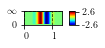

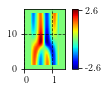

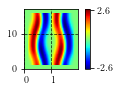

In [9]:
for o in td.values():
    o.plot()

In [6]:
leftslant = read_h5('RelativeOrbitKS_T8p436_L13p103.h5')
leftslant = leftslant.reshape(256,256)
rightslant = leftslant.reflection()
leftslant = convert_class(leftslant.convert(to='field').change_reference_frame(to='physical'), 
                          OrbitKS).rescale(np.abs(td[1].convert(to='field').state).max())
rightslant = convert_class(rightslant.convert(to='field').change_reference_frame(to='physical'),
                           OrbitKS).rescale(np.abs(td[1].convert(to='field').state).max())
tdl = td.copy()
tdl[1] = leftslant
tdr = td.copy()
tdr[1] = rightslant
td_dict = {0: tdl, 1: tdr, 2: td}

In [ ]:
leftslant = read_h5('RelativeOrbitKS_T8p892_L13p096.h5', 
                    directory='../data/local/continuation/merge_tile_coarse/').reshape(256,256)
rightslant = leftslant.reflection()

leftslant = convert_class(leftslant.convert(to='field').change_reference_frame(to='physical'), 
                          OrbitKS).rescale(np.abs(td[1].convert(to='field').state).max())

rightslant = convert_class(rightslant.convert(to='field').change_reference_frame(to='physical'),
                           OrbitKS).rescale(np.abs(td[1].convert(to='field').state).max())

tdl = td.copy()
tdl[1] = leftslant
tdr = td.copy()
tdr[1] = rightslant
td_dict = {0: tdl, 1: tdr, 2: td}

In [ ]:
local_tiles = []
for s in range(9):
    np.random.seed(s)
    symbol_array = (3*np.random.rand(10, 10)).astype(int)
    np.random.seed(s)
    local_shift_dict = td_dict[int(2.25*np.random.rand())] 
    local_tiles.append(tile(symbol_array, local_shift_dict, OrbitKS, stripwise=True, gluing_order=(1,0)))

In [ ]:
reqv_local_shift = glue(np.array(local_tiles).reshape(3,3), OrbitKS, stripwise=True, gluing_order=(1,0))

In [ ]:
reqv_local_shift.plot(padding=True, padding_shape=(2048, 2048))

In [ ]:
reqv_local_shift.to_h5(filename='OrbitKS_reqv_local_shift_initial.h5', directory='../data/local/testing/')
reqv_local_shift.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                              filename='OrbitKS_reqv_local_shift_initial.png', directory='../data/local/testing/')
reqv_local_shift.plot(padding=True, padding_shape=(2048, 2048), save=True,
                              filename='OrbitKS_reqv_local_shift_initial.pdf', directory='../data/local/testing/')

In [ ]:
reqv_local_shift = reqv_local_shift.reshape(256, 512)

In [ ]:
reqv_local_shift_minres = converge(reqv_local_shift, verbose=True, orbit_maxiter=1000,
                                               method='minres',scipy_kwargs={'tol': 1e-8})
reqv_local_shift_minres.orbit.to_h5('reqv_local_shift_minres.h5', directory='../data/local/testing/')

In [ ]:
reqv_local_shift_minres_gd = converge(reqv_local_shift_minres.orbit, verbose=True, orbit_maxiter=250000, preconditioning=False)
reqv_local_shift_minres_gd.orbit.to_h5('reqv_local_shift_minres_gd.h5', directory='../data/local/testing/')

In [ ]:
reqv_local_shift_minres.orbit.to_h5(filename='OrbitKS_reqv_local_shift.h5', directory='../data/local/testing/')
reqv_local_shift_minres.orbit.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                              filename='OrbitKS_reqv_local_shift.png', directory='../data/local/testing/')
reqv_local_shift_minres.orbit.plot(padding=True, padding_shape=(2048, 2048), save=True,
                              filename='OrbitKS_reqv_local_shift.pdf', directory='../data/local/testing/')

In [10]:
from orbithunter.gluing import tile_dictionary_ks
td = rediscretize_tiling_dictionary(tile_dictionary_ks(), new_shape=(256,256))
# tdr = rediscretize_tiling_dictionary(tile_dictionary_ks(padded=False, comoving=True), new_shape=(256,256))

local_tiles = []
for s in range(10,):
    np.random.seed(s)
    symbol_array = (3*np.random.rand(10, 10)).astype(int)
    np.random.seed(s)
    local_shift_dict = td_dict[int(2.25*np.random.rand())] 
    local_tiles.append(tile(symbol_array, local_shift_dict, OrbitKS, stripwise=True, gluing_order=(1,0)))

In [ ]:
local_tiles = []
for s in range(10, 40):
    np.random.seed(s)
    symbol_array = (3*np.random.rand(10, 3)).astype(int)
    np.random.seed(s)
    local_shift_dict = td_dict[int(2*np.random.rand())] 
    local_tiles.append(tile(symbol_array, local_shift_dict, RelativeOrbitKS, stripwise=True, gluing_order=(1,0)))

In [95]:
from orbithunter.gluing import tile_dictionary_ks
td = tile_dictionary_ks(padding='spacetime')
# tdr = rediscretize_tiling_dictionary(tile_dictionary_ks(padded=False, comoving=True), new_shape=(256,256))

rpoleft = read_h5('RelativeOrbitKS_L13p106_T8p646.h5').reshape(256, 256)
rporight = rpoleft.reflection()
rpoleft = convert_class(rpoleft.convert(to='field').change_reference_frame(to='physical'), 
                          OrbitKS).rescale(np.abs(td[1].convert(to='field').state).max())
rporight = convert_class(rporight.convert(to='field').change_reference_frame(to='physical'),
                           OrbitKS).rescale(np.abs(td[1].convert(to='field').state).max())

leftslant = read_h5('RelativeOrbitKS_T8p436_L13p103.h5')
leftslant = leftslant.reshape(256,256)
rightslant = leftslant.reflection()
leftslant = convert_class(leftslant.convert(to='field').change_reference_frame(to='physical'), 
                          OrbitKS).rescale(np.abs(td[1].convert(to='field').state).max())
rightslant = convert_class(rightslant.convert(to='field').change_reference_frame(to='physical'),
                           OrbitKS).rescale(np.abs(td[1].convert(to='field').state).max())


tdl = td.copy()
tdl[0] = leftslant
tdl[1] = rpoleft
tdl[2] = convert_class(td[2], RelativeOrbitKS, parameters=(td[2].T, td[2].L, -td[2].L/2))

tdr = td.copy()
tdr[0] = rightslant
tdr[1] = rporight
tdr[2] = convert_class(td[2], RelativeOrbitKS, parameters=(td[2].T, td[2].L, td[2].L/2))

td_dict = {0: tdl, 1: tdr, 2: td}

test = tdl[2].change_reference_frame(to='physical').state.copy()
tdl[2] = OrbitKS(state=test+1, parameters=tdl[2].parameters, basis='field')

test = tdr[2].change_reference_frame(to='physical').state.copy()
tdr[2] = OrbitKS(state=test-1, parameters=tdr[2].parameters, basis='field')

local_tiles = []
for s in range(10, 60):
    np.random.seed(s)
    symbol_array = (3*np.random.rand(5, 3)).astype(int)
    np.random.seed(s)
    local_shift_dict = td_dict[int(3*np.random.rand())] 
    local_tiles.append(tile(symbol_array, local_shift_dict, RelativeOrbitKS, stripwise=True, gluing_order=(1,0)))

rpo_tiling_orbit = glue(np.array(local_tiles).reshape(-1,10), RelativeOrbitKS, stripwise=True, 
                        nonzero_parameters=True, gluing_order=(1,0)).reshape(256, 256)

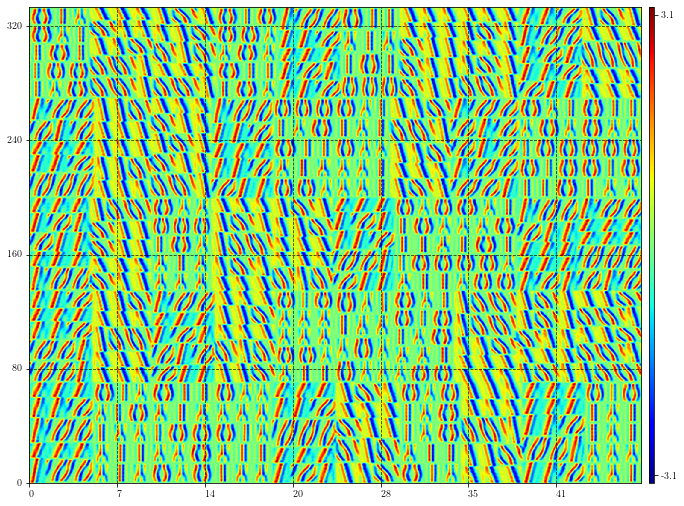

In [96]:
rpo_tiling_orbit.plot(padding=True, padding_shape=(2048,2048), fundamental_domain=False)

In [97]:
preconditioning=False
methods = 'adj'
rpo_tiling_result = converge(rpo_tiling_orbit.convert(to='modes'), verbose=True, method=methods)


-------------------------------------------------------------------------------------------------
Starting adjoint descent
Initial residual : 22996.44858896722
Target residual tolerance : 6.5536e-05
Maximum iteration number : 131072
Initial guess : RelativeOrbitKS({"basis": "modes", "parameters": ["333.4721", "433.5671", "97.4026"], "field_shape": ["256", "256"]})
-------------------------------------------------------------------------------------------------
#################################################
 Residual=15.9668411 after 5000 gradient descent steps. Parameters:(374.7092632353954, 443.926800953505, 76.81235695137308)
#################################################
 Residual=10.5096562 after 10000 gradient descent steps. Parameters:(378.95459529654204, 441.7361078824654, 77.60446139527791)
#################################################
 Residual=8.0280588 after 15000 gradient descent steps. Parameters:(381.8450495859641, 440.7939104405958, 78.29067738430449)
########

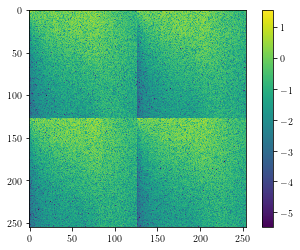

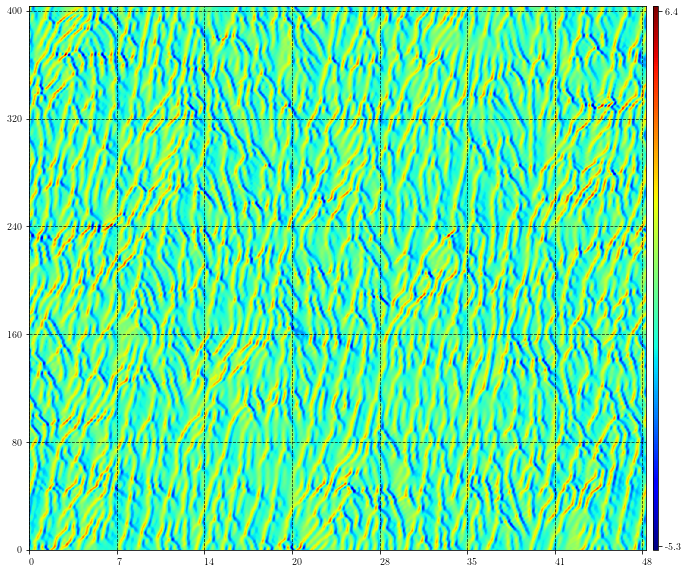

In [98]:
rpo_tiling_result.orbit.to_h5(('OrbitKS_rpo_tiling_orbit_{}.h5').format(methods),
                        directory='../data/local/huge_testing/')
rpo_tiling_result.orbit.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                              filename=('OrbitKS_rpo_tiling_orbit_{}.png').format(methods),
                       directory='../data/local/huge_testing/')
rpo_tiling_result.orbit.plot(padding=True, padding_shape=(2048, 2048), save=True,
                              filename=('OrbitKS_rpo_tiling_orbit_{}.pdf').format(methods), 
                       directory='../data/local/huge_testing/')

In [ ]:
rpo_tiling_orbit.to_h5(filename='OrbitKS_rpo_tiling_orbit_initial.h5', directory='../data/local/testing/')
rpo_tiling_orbit.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                              filename='OrbitKS_rpo_tiling_orbit_initial.png', directory='../data/local/testing/')
rpo_tiling_orbit.plot(padding=True, padding_shape=(2048, 2048), save=True,
                              filename='OrbitKS_rpo_tiling_orbit_initial.pdf', directory='../data/local/testing/')

for n in range(500):
    rpo_tiling_result = converge(rpo_tiling_orbit.convert(to='modes').reshape(512, 512), verbose=True, maxiter=1,
                                                   method='adj', preconditioning=True)
    rpo_tiling_result.orbit.to_h5(('OrbitKS_rpo_tiling_orbit_n{}.h5').format(),
                            directory='../data/local/huge_testing/')
    rpo_tiling_result.orbit.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                                  filename=('OrbitKS_rpo_tiling_orbit_n{}.png').format(),
                           directory='../data/local/huge_testing/')
    rpo_tiling_result.orbit.plot(padding=True, padding_shape=(2048, 2048), save=True,
                                  filename=('OrbitKS_rpo_tiling_orbit_n{}.pdf').format(), 
                           directory='../data/local/huge_testing/')
    
rpo_tiling_result.to_h5(filename='OrbitKS_rpo_tiling_result.h5', directory='../data/local/testing/')
rpo_tiling_result.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                              filename='OrbitKS_rpo_tiling_result.png', directory='../data/local/testing/')
rpo_tiling_result.plot(padding=True, padding_shape=(2048, 2048), save=True,
                              filename='OrbitKS_rpo_tiling_result.pdf', directory='../data/local/testing/')

In [ ]:
for n in range(500):
    rpo_tiling_result = converge(rpo_tiling_orbit.convert(to='modes').reshape(256, 512), verbose=True, maxiter=1,
                                                   method='gmres', preconditioning=True)
    rpo_tiling_result.orbit.to_h5(('OrbitKS_rpo_tiling_orbit_n{}.h5').format(),
                            directory='../data/local/huge_testing/')
    rpo_tiling_result.orbit.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                                  filename=('OrbitKS_rpo_tiling_orbit_n{}.png').format(),
                           directory='../data/local/huge_testing/')
    rpo_tiling_result.orbit.plot(padding=True, padding_shape=(2048, 2048), save=True,
                                  filename=('OrbitKS_rpo_tiling_orbit_n{}.pdf').format(), 
                           directory='../data/local/huge_testing/')

In [ ]:
rpo_tiling_result.to_h5(filename='OrbitKS_rpo_tiling_result.h5', directory='../data/local/testing/')
rpo_tiling_result.plot(show=False, padding=True, padding_shape=(2048, 2048), save=True, 
                              filename='OrbitKS_rpo_tiling_result.png', directory='../data/local/testing/')
rpo_tiling_result.plot(padding=True, padding_shape=(2048, 2048), save=True,
                              filename='OrbitKS_rpo_tiling_result.pdf', directory='../data/local/testing/')